# Making a map of renewable power stations in Argentina

I will be using Pandas, GeoPandas, and MatplotLib

The data of the renewable stations was obtained through the argentinian government website, here: http://datos.energia.gob.ar/dataset/centrales-energia-renovables/archivo/dc334eb4-3450-45c6-a340-37494c78e090

The political argentinian map was obtained here: https://map.igismap.com/analysis/map/13749/gisData757

In [1]:
import geopandas as gpd
%matplotlib inline

In [2]:
argentina = gpd.read_file('centrales-renovables.csv', encoding='utf-8')


This is the original file structure. We need to change this into a proper GeoDataFrame

In [6]:
argentina

,id,proyecto,provincia,tecnologia,ronda,potencia_mw,latitud,longitud,avance,estado,periodo_max,geojson,geometry
0,108-BM-01,C.T. GARRUCHOS,CORRIENTES,BIOMASA,RESOLUCIÓN 108/2011,36,-27.949589,-55.993064,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-55.993064,-27....",None
1,108-EOL-01,P.E. NECOCHEA,BUENOS AIRES,EÓLICA,RESOLUCIÓN 108/2011,0.25,-38.60429722,-58.79039722,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-58.79039722,-3...",None
2,108-EOL-02,P.E. DIADEMA,CHUBUT,EÓLICA,RESOLUCIÓN 108/2011,6.3,-45.74651111,-67.69478333,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-67.69478333,-4...",None
3,108-EOL-03,P.E. TORDILLO,CHUBUT,EÓLICA,RESOLUCIÓN 108/2011,3,-45.85096,-67.90829,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-67.90829,-45.8...",None
4,108-EOL-04,P.E. ARAUCO I ETAPA I,LA RIOJA,EÓLICA,RESOLUCIÓN 108/2011,25.2,-28.66835,-66.75241,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-66.75241,-28.6...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,SPT-PAH-29,P.A.H. QUEBRADA ULLUM,SAN JUAN,PAH,SPOT,45,-31.474165,-68.649661,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-68.649661,-31....",None
278,SPT-PAH-30,P.A.H. ULLUM,SAN JUAN,PAH,SPOT,43.6,-31.455696,-68.755712,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-68.755712,-31....",None
279,SPT-PAH-31,P.A.H. LOMA ATRAVESADA,RÍO NEGRO,PAH,SPOT,2,-39.471939,-68.82682,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-68.82682,-39.4...",None
280,SPT-PAH-32,P.A.H. CACHEUTA VI,MENDOZA,PAH,SPOT,9,-33.007337,-69.1250206,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-69.1250206,-33...",None


The next function will create our geometry column

In [7]:
argentina['geometry']=gpd.points_from_xy(argentina.longitud, argentina.latitud)

In [8]:
argentina.head()

,id,proyecto,provincia,tecnologia,ronda,potencia_mw,latitud,longitud,avance,estado,periodo_max,geojson,geometry
0,108-BM-01,C.T. GARRUCHOS,CORRIENTES,BIOMASA,RESOLUCIÓN 108/2011,36,-27.949589,-55.993064,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-55.993064,-27....",POINT (-55.99306 -27.94959)
1,108-EOL-01,P.E. NECOCHEA,BUENOS AIRES,EÓLICA,RESOLUCIÓN 108/2011,0.25,-38.60429722,-58.79039722,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-58.79039722,-3...",POINT (-58.79040 -38.60430)
2,108-EOL-02,P.E. DIADEMA,CHUBUT,EÓLICA,RESOLUCIÓN 108/2011,6.3,-45.74651111,-67.69478333,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-67.69478333,-4...",POINT (-67.69478 -45.74651)
3,108-EOL-03,P.E. TORDILLO,CHUBUT,EÓLICA,RESOLUCIÓN 108/2011,3,-45.85096,-67.90829,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-67.90829,-45.8...",POINT (-67.90829 -45.85096)
4,108-EOL-04,P.E. ARAUCO I ETAPA I,LA RIOJA,EÓLICA,RESOLUCIÓN 108/2011,25.2,-28.66835,-66.75241,1,Finalizado,202111,"{""type"":""Point"",""coordinates"":[-66.75241,-28.6...",POINT (-66.75241 -28.66835)


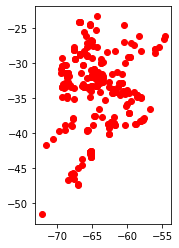

In [9]:
ax = argentina.plot(color = 'red')

There are the argentinian hydraulic energy stations. But this map is sort of lacking something: an actual political map. Lets put one there. 

In [10]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
political_argentina_map = gpd.read_file('argentina_administrative_boundaries_province_polygon.kml', driver='KML')

In [11]:
political_argentina_map.head()

,Name,Description,geometry
0,Tierra del Fuego,,"POLYGON ((-68.26651 -54.86977, -68.26557 -54.8..."
1,Tierra del Fuego,,"POLYGON ((-68.25848 -54.84744, -68.25846 -54.8..."
2,Tierra del Fuego,,"POLYGON ((-68.24592 -54.87810, -68.24577 -54.8..."
3,Tierra del Fuego,,"POLYGON ((-68.25344 -54.87510, -68.25320 -54.8..."
4,Tierra del Fuego,,"POLYGON ((-68.24273 -54.85912, -68.24228 -54.8..."


<AxesSubplot:title={'center':'Hydroelectric stations in Argentina'}>

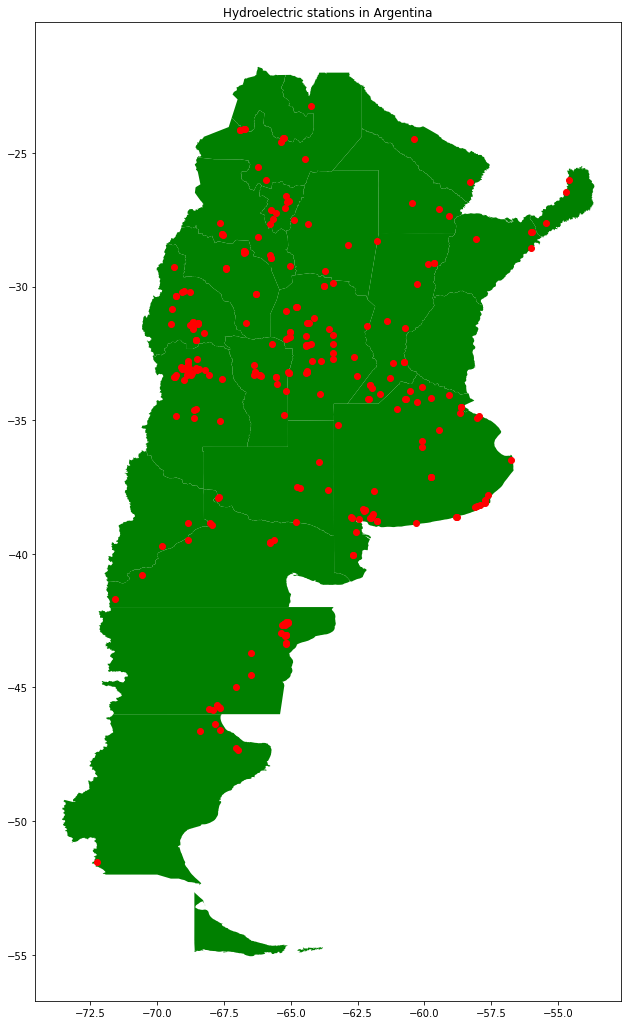

In [12]:
ax = political_argentina_map.plot(color='green', markersize = 1,zorder=0, figsize=(30,18))
ax.set_title('Hydroelectric stations in Argentina')
minx, miny, maxx, maxy = political_argentina_map.geometry.total_bounds
argentina.plot(color = 'red', ax=ax)


# Folium : Interactive Map

In [3]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster, FeatureGroupSubGroup
import math

In [4]:
map_renewables = folium.Map(location=[-35,-58], tiles='openstreetmap', zoom_start=4)

In [5]:
map_type_objects = {
    'BIOMASA':{
        'color':'#FF0000',
        'eng_name':'Biomass'
    },
    'EÓLICA':{
        'color':'#2F4F2F',
        'eng_name':'Wind'
    },
    'SOLAR':{
        'color':'#FFFF00',
        'eng_name':'Solar'
    },
    'PAH':{
        'color':'#FF7F00',
        'eng_name':'Hydroelectric'
    },
    'BIOGÁS':{
        'color':'#800080',
        'eng_name':'Biogas'
    },
    'BRS':{
        'color':'#000000',
        'eng_name':'Landfill biogas'
    }
}
def get_color_and_group(energy_type:str, avance:int):
    try:
        color = map_type_objects[energy_type]['color']
        if avance == 1:
            layer = map_type_objects[energy_type]['layer_finished_construction']
        else:
            layer = map_type_objects[energy_type]['layer_in_construction']
        return [color, layer]
    except Exception as e:
        raise e
def create_layers():
    for type_energy in map_type_objects:
        # create a layer as markercluster
        map_type_objects[type_energy]['layer']=MarkerCluster(name=map_type_objects[type_energy]['eng_name'], control=False)
        #create subgroups for finished plants
        map_type_objects[type_energy]['layer_finished_construction'] = FeatureGroupSubGroup(map_type_objects[type_energy]['layer'], f"{map_type_objects[type_energy]['eng_name']} operational")
        map_type_objects[type_energy]['layer_in_construction'] = FeatureGroupSubGroup(map_type_objects[type_energy]['layer'], f"{map_type_objects[type_energy]['eng_name']} in construction")

        # create a control group
        map_type_objects[type_energy]['control']=folium.FeatureGroup(name=map_type_objects[type_energy]['eng_name'])
        # add the layer to the control group
        map_type_objects[type_energy]['control'].add_child(map_type_objects[type_energy]['layer'])


In [6]:
create_layers()

In [7]:
map_type_objects

{'BIOMASA': {'color': '#FF0000',
  'eng_name': 'Biomass',
  'layer': <folium.plugins.marker_cluster.MarkerCluster at 0x7f9de5c8eb20>,
  'layer_finished_construction': <folium.plugins.feature_group_sub_group.FeatureGroupSubGroup at 0x7f9de5c8ea00>,
  'layer_in_construction': <folium.plugins.feature_group_sub_group.FeatureGroupSubGroup at 0x7f9de5c8e2e0>,
  'control': <folium.map.FeatureGroup at 0x7f9de5c8e280>},
 'EÓLICA': {'color': '#2F4F2F',
  'eng_name': 'Wind',
  'layer': <folium.plugins.marker_cluster.MarkerCluster at 0x7f9de5c8e910>,
  'layer_finished_construction': <folium.plugins.feature_group_sub_group.FeatureGroupSubGroup at 0x7f9de5c8e700>,
  'layer_in_construction': <folium.plugins.feature_group_sub_group.FeatureGroupSubGroup at 0x7f9de5c8ed90>,
  'control': <folium.map.FeatureGroup at 0x7f9de5c8edc0>},
 'SOLAR': {'color': '#FFFF00',
  'eng_name': 'Solar',
  'layer': <folium.plugins.marker_cluster.MarkerCluster at 0x7f9de5c8e760>,
  'layer_finished_construction': <folium.plu

In [8]:
#to generate partial circles to show non finished plants
def polarToCartesian(centerx, centery, radius, angle):
    pos_neg = 90-angle
    if pos_neg < 0:
        non_neg = 360 + pos_neg
    else:
        non_neg = pos_neg
    angle_radian = (non_neg) * math.pi / 180
    x = centerx + (radius * math.cos(angle_radian))
    y = centery - (radius * math.sin(angle_radian))
    return x,y

def describeArc(x,y,radius,start_angle, end_angle):
    start = polarToCartesian(x,y,radius,start_angle)
    end = polarToCartesian(x,y,radius,end_angle)
    if end_angle >=180:
        big_arc = "1"
    else:
        big_arc = "0"
    large_arc_flag = "1" 
   
    d = f"M {x} {y} L {x} {y-radius} A {radius} {radius} 0 {big_arc}, {large_arc_flag}, {end[0]},{end[1]} z"
    return d

In [9]:
def add_layers_to_map(folium_map):
    for type_energy in map_type_objects:
        map_type_objects[type_energy]['layer'].add_to(folium_map)
        map_type_objects[type_energy]['layer_finished_construction'].add_to(folium_map)
        map_type_objects[type_energy]['layer_in_construction'].add_to(folium_map)
    folium_map.add_child(folium.LayerControl())
        #map_type_objects[type_energy]['control'].add_to(folium_map)

In [10]:
#now we add the markers
for i in range(0, len(argentina)):
    row = argentina.iloc[i]
    avance = float(row['avance'])
    color, layer = get_color_and_group(row['tecnologia'], avance)
    if avance == 1:
        folium.Marker(
        location = [argentina.iloc[i]['latitud'], argentina.iloc[i]['longitud']],
                    popup=folium.Popup(f"Nombre: {argentina.iloc[i]['proyecto']}\n Potencia: {argentina.iloc[i]['potencia_mw']}MW", parse_html=True),
                    icon=folium.DivIcon(
                        html=f"""<div><svg height="35" width="35"><circle cx="15", cy="15", r="15" fill="{color}" stroke="black" stroke-width="1"/></svg></div>""",
                        icon_size=(1,1), popup_anchor=(0.1,0.1))
                    ).add_to(layer)
    elif avance > 0 and avance < 1:
        # if avance is lower than .25 it becomes really hard to see
        if avance < 0.25:
            avance = 0.25
        path = describeArc(15,15,15,0,avance*360)
        folium.Marker(
            location = [argentina.iloc[i]['latitud'], argentina.iloc[i]['longitud']],
                        popup=folium.Popup(f"Nombre: {argentina.iloc[i]['proyecto']}\n Potencia: {argentina.iloc[i]['potencia_mw']}MW", parse_html=True),
                        icon=folium.DivIcon(html=f"""<div style="text-align:center;"><svg height="35" width="35"><path d="{path}" stroke="black"  fill="{color}" /></svg></div>""")
                        ).add_to(layer)


In [11]:
add_layers_to_map(map_renewables)

In [12]:
map_renewables

In [13]:
map_renewables.save("map.html")